# Regression

Step 1 Split the dataset into training and test sets (80, 20).

In [56]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X, y = load_boston(return_X_y=True)
boston = load_boston()
name_data = boston.feature_names
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Step 2(a) Use all the features (1-13) to fit the linear regression model for feature 14 using
the training set.

In [57]:
#  fit the model on the training set and predict with the fitted model on the testing set
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred=regr.predict(x_test)

Step 2(b) Report the coefficients, mean squared error and variance score for the model on
the test set.

In [58]:
# use these scores to measure the efficacy of a particular linear model
print('Coefficients:', regr.coef_)
# The mean squared errors
print('Mean squared error: ' + str(np.mean((y_pred - y_test)** 2)))
# Explained variance score
print('Variance score: ' + str(regr.score(x_test, y_test)))

Coefficients: [-1.39483773e-01  3.88233733e-02  3.71464885e-02  2.70188010e+00
 -1.51430732e+01  4.19850580e+00 -1.24888623e-02 -1.37160538e+00
  3.04873972e-01 -1.24383425e-02 -9.47909340e-01  7.91186122e-03
 -4.85800585e-01]
Mean squared error: 25.517090723116826
Variance score: 0.7456242711992636


Step 3(a) Use each feature alone - to fit a linear regression model on the training set.

Step 3(b) Report the coefficient, mean squared error and variance score for the model on
the test set. Also report the thirteen plots of the linear regression models generated on each
feature. Each plot should distinctly show the training points, test points and the linear
regression line

CRIM
Coefficients: [-0.56057698]
Mean squared error86.31164246068698
Variance score-0.05935647993390458
ZN
Coefficients: [0.15738535]
Mean squared error81.10230912636925
Variance score0.008319064178425872
INDUS
Coefficients: [-0.66245437]
Mean squared error86.0795619645256
Variance score0.1726802624710052
CHAS
Coefficients: [5.5813977]
Mean squared error82.42096098433207
Variance score0.04961496552871747
NOX
Coefficients: [-34.18779349]
Mean squared error82.32359584991129
Variance score0.1504852700994257
RM
Coefficients: [8.97346674]
Mean squared error56.025888912798365
Variance score0.3379134762772519
AGE
Coefficients: [-0.12597904]
Mean squared error69.68555886108808
Variance score0.09276934135285675
DIS
Coefficients: [1.18598452]
Mean squared error89.5987475475542
Variance score0.018805134215077124
RAD
Coefficients: [-0.44188084]
Mean squared error60.67762305759674
Variance score0.003560877687791675
TAX
Coefficients: [-0.02635087]
Mean squared error64.9807664476653
Variance score0.1

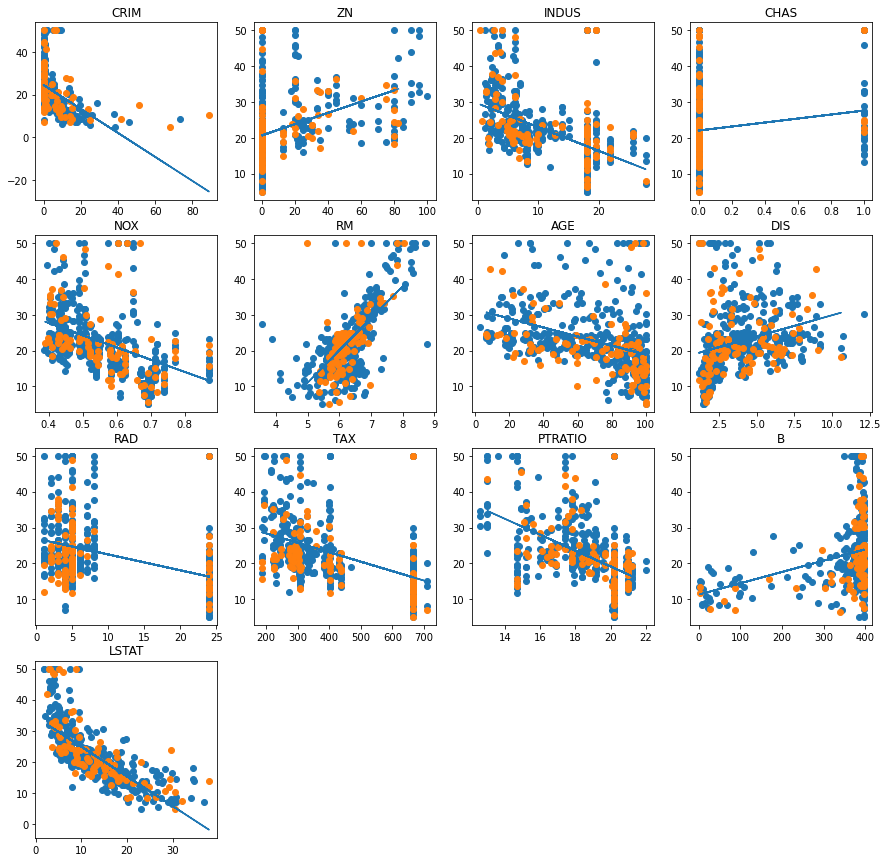

In [59]:
plt.figure(figsize=(15, 15))
for i in range(13):
    plt.subplot(4, 4, i + 1)
    # Use each feature alone - to fit a linear regression model on the training set
    x = pd.DataFrame(boston.data[:,i])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    regr2 = LinearRegression()
    regr2.fit(x_train, y_train)
    y_pred =regr2.predict(x_test)

    # training points
    plt.scatter(x_train, y_train, label='train')
    # test points
    plt.scatter(x_test, y_test, label='test')
    # linear regression line
    plt.plot(x_test.values.reshape(-1, 1), y_pred,label='line')
    plt.title(str(boston.feature_names[i]))

    print(boston.feature_names[i])
    # The coefficients
    print('Coefficients:', regr2.coef_)
    # The mean squared error
    print('Mean squared error' + str(np.mean((y_pred-y_test)**2)))
    # Explained variance score
    print('Variance score' + str(regr2.score(x_test, y_test)))
plt.show()

Step 4(a) Step 4(b) Perform 10 iterations of (Step 1, Step 2(a), and Step 3(a)).

CRIM
Averange of coefficients:-0.41545522926976064
Averange of mean squared error:74.8176459869019
Averange of variance score:0.1402593488713481
ZN
Averange of coefficients:0.14572391977295587
Averange of mean squared error:80.40129987976316
Averange of variance score:0.08474229594378185
INDUS
Averange of coefficients:-0.6485377034754864
Averange of mean squared error:61.01111652237042
Averange of variance score:0.2432757606632502
CHAS
Averange of coefficients:7.030558350859583
Averange of mean squared error:85.2709175695394
Averange of variance score:-0.01203562851847081
NOX
Averange of coefficients:-34.121761555133475
Averange of mean squared error:74.02648757229852
Averange of variance score:0.16917187692193109
RM
Averange of coefficients:9.051405185819352
Averange of mean squared error:45.87069857662566
Averange of variance score:0.47974643107323844
AGE
Averange of coefficients:-0.12510175617266422
Averange of mean squared error:79.69970368406652
Averange of variance score:0.111597

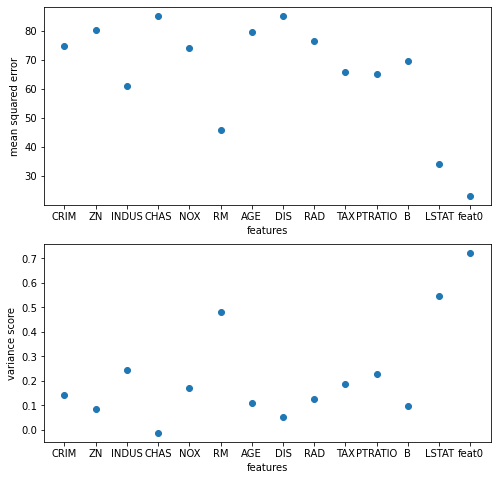

In [60]:
coef_temp=[]
mse_all=[]
vs_all=[]
coef_feas = []
mse_feas = []
vs_feas = []
# For all the features, compute the average, over the 10 iterations, of each evaluation metric.
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    regr=LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    # The coefficients
    coef_temp.append(regr.coef_)
    # The mean squared error
    mse_all.append(np.mean((y_pred-y_test)**2))
    # Explained variance score
    vs_all.append(regr.score(x_test,y_test))
    
for i in range(10):
    coef_feas_temp = []
    mse_feas_temp = []
    vs_feas_temp = []
    # For each feature, compute the average, over the 10 iterations, of each evaluation metric
    for j in range(13):
        x=pd.DataFrame(boston.data[:,j])
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        regr2 = LinearRegression()
        regr2.fit(x_train, y_train)
        y_pre =regr2.predict(x_test)
        coef_feas_temp.append(regr2.coef_)
        mse_feas_temp.append(np.mean((y_pre-y_test)**2))
        vs_feas_temp.append(regr2.score(x_test,y_test))
    coef_feas.append(coef_feas_temp)
    mse_feas.append(mse_feas_temp)
    vs_feas.append(vs_feas_temp)
coef_all=[]
coef=[]
mse=[]
vs=[]

for i in range(13):
    temp_all=0
    temp=0
    temp_mse=0
    temp_vs=0
    for j in range(10):
        temp_all+=coef_temp[j][i]
        temp += coef_feas[j][i]
        temp_mse+=mse_feas[j][i]
        temp_vs+=vs_feas[j][i]
    temp_all=temp_all/10
    temp=temp/10
    temp_mse=temp_mse/10
    temp_vs=temp_vs/10
    coef_all.append(temp_all)
    coef.append(temp)
    mse.append(temp_mse)
    vs.append(temp_vs)
    print(boston.feature_names[i])
    print("Averange of coefficients:" + str(temp[0]))
    print("Averange of mean squared error:"  + str(mse[i]))
    print("Averange of variance score:"  + str(vs[i]))

print("for all features")
print("Averange of coefficients:",coef_all)
print("Averange of mean squared error:" + str(np.mean(mse_all) ))
print("Averange of variance score:" + str(np.mean(vs_all)))

plt.figure(figsize=(8, 8))
name_data_list=name_data.tolist()
#  designate a point on the features axis for ’all 13 features’ named as 'feature 0'
name_data_list.append("feat0")
mse.append((sum(mse_all) / len(mse_all)))
vs.append((sum(vs_all) / len(vs_all)))
plt.subplot(2,1,1)
s1=plt.scatter(name_data_list,mse)
plt.ylabel('mean squared error')
plt.xlabel('features')
plt.subplot(2,1,2)
s2=plt.scatter(name_data_list,vs)
plt.ylabel('variance score')
plt.xlabel('features')
plt.show()


1. Based upon the linear models you generated, which feature appears to be most predictive for the target feature? Note that you can answer this question based upon the output provided for the linear models.

LSTAT and RM. Because their mean squared errors are low and their variance scores are high among all the features.

2. Suppose you need to select two features for a linear regression model to predict the target feature. Which two features would you select? Why?

LSTAT and RM. Because they are most predictives for the target which means that they have a relatively obvious linear relationship.

3. Examine all the plots and numbers you have, do you have any comments on them? Do you find any surprising trends? Do you have any idea about what might be causing this surprising trend in the data? This is a descriptive question meant to encourage you to interpret your results and express yourself.

The linear model using all 13 features predicts the best results. Some of the features especially CHAS and RAD are not very predictive of the target, their mean square errors are not very low and their high variance scores are not high enough. As far as I concerned, it is because that living close to the river or roads can be either good or bad for housing price. CHAS and RAD may have extreme data distributions and there is no apparent linear relationship between them and the target. What's more, CRIM and LSTAT which represent the crime rate and the lower status of the population respectively, are both inversely proportional to the housing price.
